In [1]:
import pandas as pd
import datetime
import numpy as np 
import scipy.stats as stats

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FormatStrFormatter 
#matplotlib.style.use('seaborn-dark-palette')
#matplotlib.style.use('seaborn-deep')
#matplotlib.style.use('seaborn-poster')
matplotlib.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.height', 500)


from __future__ import division,print_function
np.set_printoptions(precision=4, linewidth=100)
from importlib import reload

height has been deprecated.



In [2]:
from importlib import reload

In [3]:
import kmeans; reload(kmeans)
from kmeans import Kmeans

In [4]:
n_clusters=6
n_samples=250

In [5]:
centroids=np.random.uniform(-35, 35, (n_clusters,2))
slices=[np.random.multivariate_normal(centroids[i], np.diag([5.,5.,]), n_samples) for i in range(n_clusters)]

In [6]:
data=np.concatenate(slices).astype(np.float32)

In [26]:
datapath='/home/ubuntu/data/'
from utils import *
import utils; reload(utils)
import pickle

In [28]:
dfFeature=pd.read_pickle(datapath+'dffeaturepivot_grouped.pkl')
dfFeature.reset_index(inplace=True)
dfFeature=dfFeature.rename(columns={'index':'visitorId'})
dfFeature.fillna(0., inplace=True)
#dfFeature.head()

In [29]:
dfuser=pd.read_pickle(datapath+'dfuserclearbit.pkl')

In [30]:
hostIds=dfuser[dfuser.UserType=='Host'].PendoId.unique()
guestIds=dfuser[dfuser.UserType=='Guest'].PendoId.unique()
len(guestIds), len(hostIds)

(922316, 72283)

In [32]:
dfFeature=dfFeature[dfFeature.visitorId.isin(hostIds)]
dfFeature=dfFeature[(dfFeature.DaysActive>90) ]
dfFeature.shape
try:
    dfFeature=dfFeature.set_index('visitorId')
except: pass

In [33]:
def remove_corr (df, features):
    c= df[features].corr().abs()

    s = c.unstack()
    so = s.sort_values(ascending=False)
    so = s.sort_index()
    so.columns=['name1','name2','correlation']
    #pd.set_option('display.height', 500)

    so=so.drop_duplicates()
    correlatedfeatures=so[(so>0.8) & (so<1.0) ].index.get_level_values(0).unique().tolist()
    so=so[(so>0.8) & (so<1.0) ]
    correlatedfeatures=list(set(so.index.get_level_values(1))-set(so.index.get_level_values(0)))
    print(correlatedfeatures)
    #print(so.head())
    return (correlatedfeatures)

In [34]:

features=dfFeature._get_numeric_data().columns

In [35]:
Nonfeatures=['LastEventDate','FirstEventDate','OS','Browser','DaysActive','NumOfDaysEvents',]
correlatedfeatures=remove_corr (dfFeature, features)
while len(correlatedfeatures)>0:
    correlatedfeatures=remove_corr (dfFeature, features)
    features=[i for i in features if i not in correlatedfeatures]
len(features)  

['Documents | Quick Views_DailyMinutes', 'Documents | Version_DailyMinutes', 'Help & Support_DailyMinutes', 'Site | Project Management_DailyMinutes', 'Documents | Download_DailyMinutes', 'View As_DailyMinutes', 'Edit User_DailyMinutes', 'Messages_DailyMinutes', 'Reports_DailyMinutes', 'Documents | Set Permissions_DailyMinutes', 'Documents | Document Management_DailyMinutes', 'NumOfDaysEvents', 'Documents | Upload_DailyMinutes', 'Q&A | Finish Q&A Setup_DailyMinutes', 'Site | Project Navigation_DailyMinutes', 'Profile_DailyMinutes', 'Search_DailyMinutes', 'Project | Settings_DailyMinutes', 'Documents | Notify Users_DailyMinutes', 'Other Chrome Features_DailyMinutes', 'Add a Project_DailyMinutes', 'Site | Reports |_DailyMinutes', 'Site | Users _DailyMinutes', 'Documents | Delete documents_DailyMinutes', 'Site Processes_DailyMinutes', 'Documents | Document Navigation_DailyMinutes', 'Download Tools/Plugins_DailyMinutes', 'Documents | Grill | Click on Document name_DailyMinutes', 'Logout_Dai

37

In [36]:
from sklearn.preprocessing import StandardScaler, RobustScaler, normalize, MinMaxScaler, FunctionTransformer

X=dfFeature[features]
X=X.as_matrix()
print(stats.skew(X).min(),stats.skew(X).max(), stats.skew(X).mean() )

transformer = FunctionTransformer(np.log1p)
X=transformer.transform(dfFeature[features].as_matrix())
X.shape

#X=normalize(X)
#X=RobustScaler().fit_transform(X)
#X=StandardScaler().fit_transform(X) # unit variance 
X=MinMaxScaler().fit_transform(X)
print(stats.skew(X).min(),stats.skew(X).max(), stats.skew(X).mean() )
print(X.min(),X.max(),X.mean(),X.shape)

-0.17085139733 62.7309486708 14.9983232804
-0.51573780814 55.1686577898 9.14784675064
0.0 1.0 0.0598356007127 (6360, 37)


In [37]:
X.shape

(6360, 37)

In [38]:
data=X

In [39]:
data.shape

(6360, 37)

In [9]:
#??kmeans.plot_data()

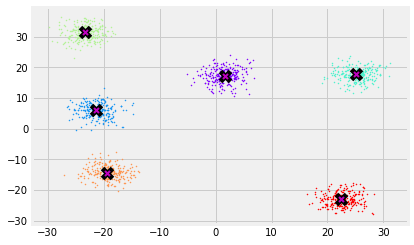

In [10]:
kmeans.plot_data(centroids, data, n_samples)

In [40]:
k = Kmeans(data, n_clusters)

In [41]:


import math, numpy as np, tensorflow as tf, matplotlib.pyplot as plt, operator


In [42]:
sess = tf.InteractiveSession()

In [43]:
tf.global_variables_initializer().run()
initial_centroids = k.find_initial_centroids(n_clusters).eval()

In [45]:
#kmeans.plot_data(initial_centroids, data, n_samples)

In [46]:
curr_centroids = tf.Variable(initial_centroids)
nearest_indices = k.assign_to_nearest(curr_centroids)
updated_centroids = k.update_centroids(nearest_indices)
tf.global_variables_initializer().run()

In [48]:
#kmeans.plot_data(updated_centroids.eval(), data, n_samples)

In [49]:
curr_centroids.assign(updated_centroids)

<tf.Tensor 'Assign_3:0' shape=(6, 37) dtype=float64_ref>

In [50]:
with tf.Session().as_default(): 
    new_centroids = k.run()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


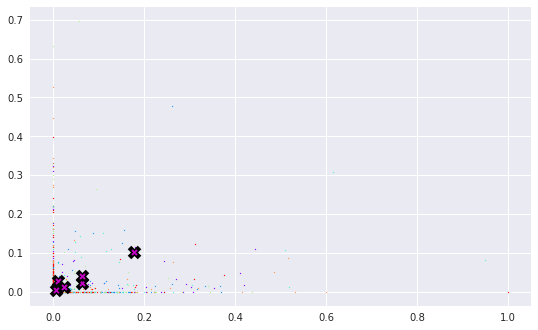

In [51]:
kmeans.plot_data(new_centroids, data, n_samples)

## Mean shift

In [97]:
def gaussian(d, bw):
    return np.exp(-0.5*((d/bw))*2)/(bw*math.sqrt(2*math.pi))

In [98]:
def meanshift(data):
    X = np.copy(data)
    for it in range(5):
        for i, x in enumerate(X):
            dist= np.sqrt(((x-X)**2).sum(1))
            weight= gaussian(dist, 2.5)
            X[i] = (np.expand_dims(weight,1)*X).sum(0) / weight.sum()
    return X
            

In [101]:
#??meanshift()

In [100]:
%time X=meanshift(TsneData)

CPU times: user 16.2 s, sys: 0 ns, total: 16.2 s
Wall time: 15.8 s


In [102]:
X

array([[-0.3802, -0.1839],
       [-0.3802, -0.1839],
       [-0.3802, -0.1839],
       ..., 
       [-0.3799, -0.1839],
       [-0.3799, -0.1839],
       [-0.3799, -0.1839]])

In [103]:
TsneData.shape

(6360, 2)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 6360
[t-SNE] Computed conditional probabilities for sample 2000 / 6360
[t-SNE] Computed conditional probabilities for sample 3000 / 6360
[t-SNE] Computed conditional probabilities for sample 4000 / 6360
[t-SNE] Computed conditional probabilities for sample 5000 / 6360
[t-SNE] Computed conditional probabilities for sample 6000 / 6360
[t-SNE] Computed conditional probabilities for sample 6360 / 6360
[t-SNE] Mean sigma: 0.062482
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.411878
[t-SNE] Error after 325 iterations: 1.411878


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


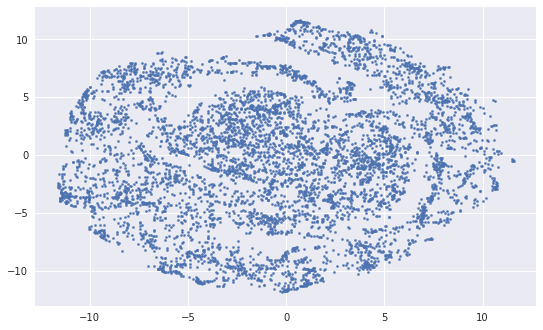

In [83]:
import hdbscan
from sklearn.manifold import TSNE
TsneData=TSNE(verbose=1, random_state=2017).fit_transform(data)
plt.scatter(*TsneData.T, s=5)

In [112]:
def plot_data(centroids, data, n_samples):
    colour = plt.cm.rainbow(np.linspace(0,1,len(centroids)))
    for i, centroid in enumerate(centroids):
        samples = data[i*n_samples:(i+1)*n_samples]
        plt.scatter(*TsneData.T, c=colour[i], s=1)
        plt.plot(centroid[0], centroid[1], markersize=10, marker="x", color='k', mew=5)
        plt.plot(centroid[0], centroid[1], markersize=5, marker="x", color='m', mew=2)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


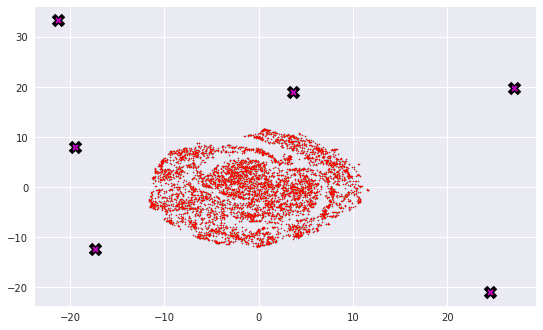

In [113]:
plot_data(centroids+2, X, n_samples)

In [59]:
import torch_utils; reload(torch_utils)
from torch_utils import *

In [60]:
def gaussian(d, bw):
    return torch.exp(-0.5*((d/bw))**2) / (bw*math.sqrt(2*math.pi))

In [61]:
def meanshift(data):
    X = torch.FloatTensor(np.copy(data))
    for it in range(5):
        for i, x in enumerate(X):
            dist = torch.sqrt((sub(x, X)**2).sum(1))
            weight = gaussian(dist, 3)
            num = mul(weight, X).sum(0)
            X[i] = num / weight.sum()
    return X

In [62]:
%time X = meanshift(data).numpy()

CPU times: user 1min 59s, sys: 0 ns, total: 1min 59s
Wall time: 1min 57s


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


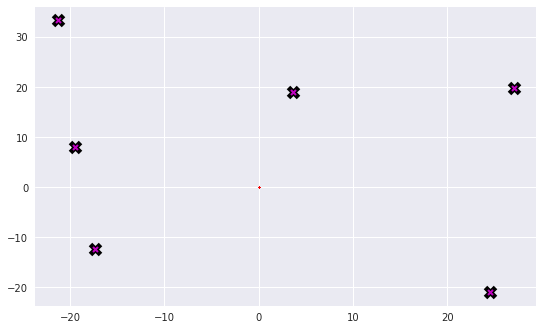

In [63]:
kmeans.plot_data(centroids+2, X, n_samples)